In [2]:
import os
from pypion.ReadData import ReadData


import numpy as np
from astropy import units as u


from matplotlib.colorbar import Colorbar
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec

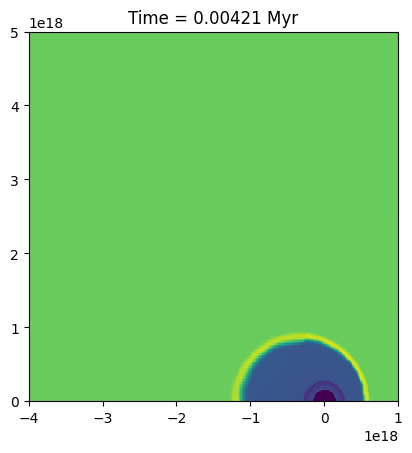

NameError: name '__file__' is not defined

In [3]:

os.chdir("/Users/thomasjones/project/pion/test/problems/Wind2D")

arr = ('Wind2D_HD_l3n0128_level00_0000.00007168.silo', 'Wind2D_HD_l3n0128_level01_0000.00007168.silo', 'Wind2D_HD_l3n0128_level02_0000.00007168.silo')
read_data = ReadData(arr)

param = 'Density'
data = read_data.get_2Darray(param)['data']

lim_max = (read_data.get_2Darray(param)['max_extents'] * u.cm)
lim_min = (read_data.get_2Darray(param)['min_extents'] * u.cm)
sim_time = (read_data.get_2Darray(param)['sim_time'] * u.s) # needed to convert float to astropy.units.quantity.Quantity class before converting to Myr
sim_time = sim_time.to(u.Myr) 

fig, ax1 = plt.subplots()

for i in range(len(data)):

      log_data = np.log10(data[i])

      ax1.set_title('Time = %5.5f Myr' % sim_time.value)

      ax1.set_xlim(lim_min[0][0].value, lim_max[0][0].value)
      ax1.set_ylim(lim_min[0][1].value, lim_max[0][1].value)

      im1 = ax1.imshow(log_data, interpolation='nearest', cmap="viridis",
                      extent=[lim_min[i][0].value, lim_max[i][0].value, lim_min[i][1].value, lim_max[i][1].value],
                      origin='lower', vmax=-22, vmin=-27)

plt.show()

os.chdir(os.path.dirname(__file__))